In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
df_test = pd.read_table("test_data_facebook-cosmetics-brand.tab")
df_test.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime People who have liked your Page and engaged with your post,log_reach,log_fans_engaged,Selected
0,continuous,discrete,discrete,discrete,discrete,discrete,discrete,continuous,continuous,continuous,continuous,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class
2,0.811908947836,Photo,1,10,7,6,0.0,-0.582196461132,-0.651817997535,-2.00459216631,-0.873387261092,No
3,0.938934808419,Status,2,12,5,11,0.0,0.248641214832,1.90980226015,0.942185563203,1.69759029023,No
4,-1.29684336531,Photo,1,3,3,10,0.0,-0.430554829678,-0.40676503921,-0.421817917035,-0.225779741854,No


In [3]:
# clean up and get only necessary columns
# Remove missing values
data = df_test[['Post Hour','Post Month','Paid','log_reach','log_fans_engaged','Type']].dropna()
# first row describes the data as discrete or continuous. We don't need that.
data=data.drop(data.index[0])
# Convert from object to float
data[['log_reach','log_fans_engaged']] = data[['log_reach','log_fans_engaged']].astype(float)
data[['Post Hour','Post Month']] = data[['Post Hour','Post Month']].astype(int)
data['Paid'] = data['Paid'].astype(float).astype(int)
data['Type'] = data['Type'].astype('category')

data.dtypes

Post Hour              int64
Post Month             int64
Paid                   int64
log_reach            float64
log_fans_engaged     float64
Type                category
dtype: object

In [4]:
data.head()

,Post Hour,Post Month,Paid,log_reach,log_fans_engaged,Type
2,6,10,0,-2.004592,-0.873387,Photo
3,11,12,0,0.942186,1.697590,Status
4,10,3,0,-0.421818,-0.225780,Photo
5,10,1,0,0.328017,0.501832,Photo
6,11,11,0,-0.120770,-0.718087,Photo


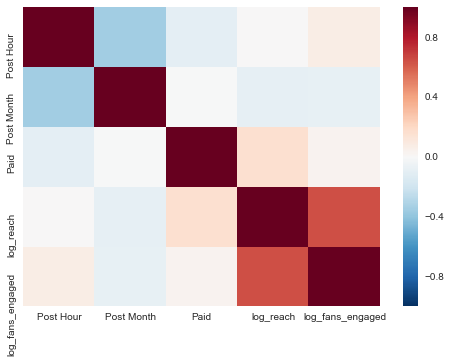

In [5]:
sns.heatmap(data.corr())

(array([  4.,  14.,  49.,  20.,  13.]),
 array([-2.92056457, -1.81866201, -0.71675945,  0.38514311,  1.48704567,
         2.58894823]),
 <a list of 5 Patch objects>)

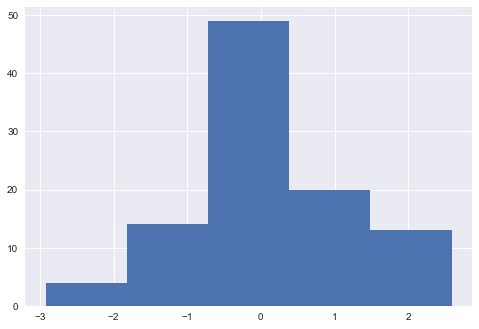

In [6]:
data['combined'] = data['log_reach'] + data['log_fans_engaged']

plt.hist(data['log_reach'],5)

(array([  1.,   2.,  43.,  43.,  11.]),
 array([-4.67764982, -3.18551449, -1.69337916, -0.20124382,  1.29089151,
         2.78302684]),
 <a list of 5 Patch objects>)

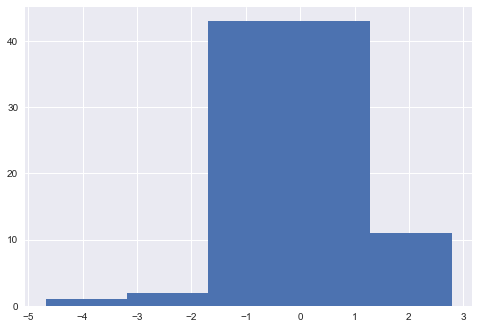

In [7]:
plt.hist(data['log_fans_engaged'],5)

In [8]:
p = data.pivot_table(index='Post Hour',columns='Post Month',values='log_reach',aggfunc=np.mean)

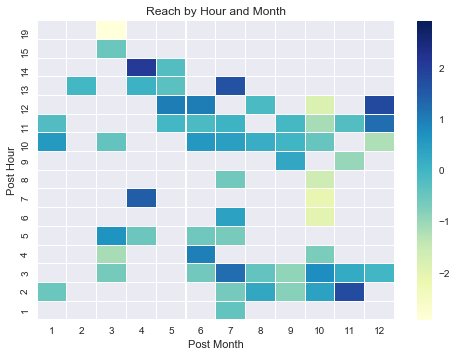

In [9]:
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Reach by Hour and Month')

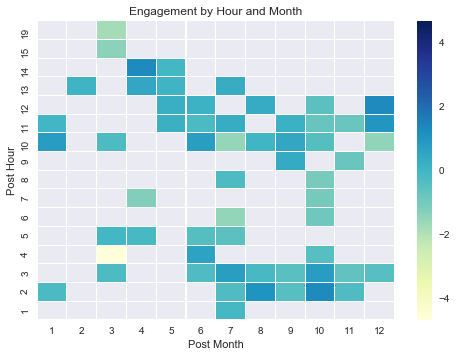

In [10]:
p = data.pivot_table(index='Post Hour',columns='Post Month',values='log_fans_engaged',aggfunc=np.mean)
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Engagement by Hour and Month')

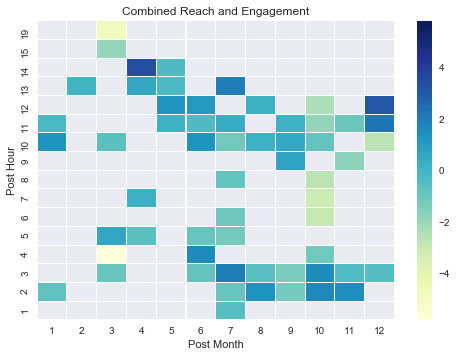

In [11]:
p = data.pivot_table(index='Post Hour',columns='Post Month',values='combined',aggfunc=np.mean)
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Combined Reach and Engagement')

In [12]:
cat_labels = ['Poor','Fair','Good','Very Good','Great']
reach_bins = [-2.92056457, -1.81866201, -0.71675945,  0.38514311,  1.48704567,
         2.58894823]
reach_groups = pd.cut(data['log_reach'],reach_bins,labels=cat_labels)
data['reach_groups'] = reach_groups


In [13]:
engage_bins = [-4.67764982, -3.18551449, -1.69337916, -0.20124382,  1.29089151,
         2.78302684]
engage_groups = pd.cut(data['log_fans_engaged'],engage_bins,labels=cat_labels)
data['engage_groups'] = engage_groups


In [14]:
data.head()

,Post Hour,Post Month,Paid,log_reach,log_fans_engaged,Type,combined,reach_groups,engage_groups
2,6,10,0,-2.004592,-0.873387,Photo,-2.877979,Poor,Good
3,11,12,0,0.942186,1.697590,Status,2.639776,Very Good,Great
4,10,3,0,-0.421818,-0.225780,Photo,-0.647598,Good,Good
5,10,1,0,0.328017,0.501832,Photo,0.829848,Good,Very Good
6,11,11,0,-0.120770,-0.718087,Photo,-0.838857,Good,Good


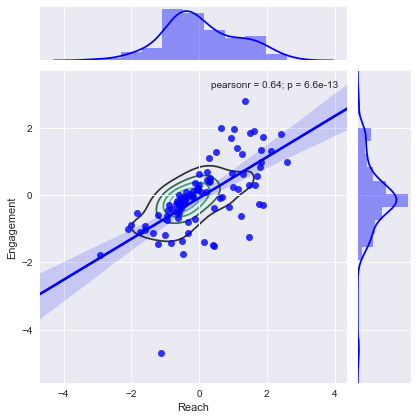

In [15]:
ax = sns.jointplot(data=data,x='log_reach',y='log_fans_engaged',
              color='b',kind='reg').plot_joint(sns.kdeplot,zorder=0,n_levels=5,color='r')
plt.xlabel('Reach')
plt.ylabel('Engagement')

In [16]:
data.head()

,Post Hour,Post Month,Paid,log_reach,log_fans_engaged,Type,combined,reach_groups,engage_groups
2,6,10,0,-2.004592,-0.873387,Photo,-2.877979,Poor,Good
3,11,12,0,0.942186,1.697590,Status,2.639776,Very Good,Great
4,10,3,0,-0.421818,-0.225780,Photo,-0.647598,Good,Good
5,10,1,0,0.328017,0.501832,Photo,0.829848,Good,Very Good
6,11,11,0,-0.120770,-0.718087,Photo,-0.838857,Good,Good


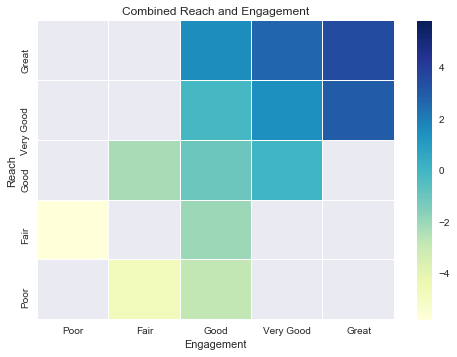

In [17]:
p = data.pivot_table(index='reach_groups',columns='engage_groups',values='combined',aggfunc=np.mean)
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Combined Reach and Engagement')
plt.ylabel('Reach')
plt.xlabel('Engagement')

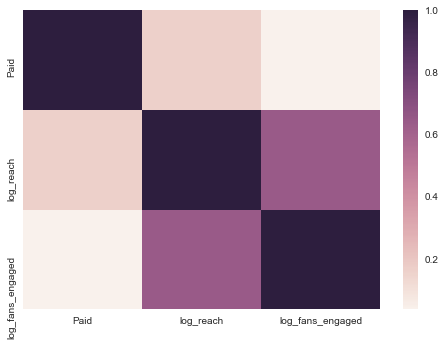

In [18]:
sns.heatmap(data[['Paid','log_reach','log_fans_engaged']].corr())

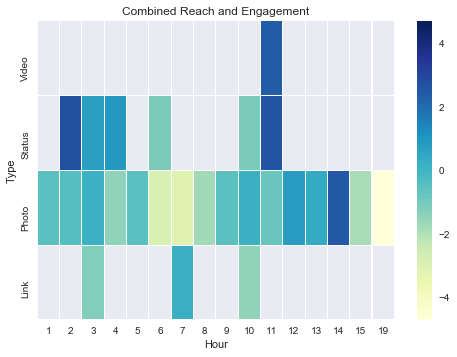

In [19]:
p = data.pivot_table(index='Type',columns='Post Hour',values='combined',aggfunc=np.mean)
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Combined Reach and Engagement')
plt.ylabel('Type')
plt.xlabel('Hour')